# Logistic Regression

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.compose import ColumnTransformer
import scikitplot as skplt
from sklearn.preprocessing import label_binarize

Reading unmodified data

In [ ]:
df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

In [ ]:
# Unmodified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Unmodified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Unmodified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Unmodified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'Without Fit_intercept', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_1.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (Ordinal encoder for categories)

In [ ]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder() # This limit gave best results
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

In [ ]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_2.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (OneHotEncoder for all features)

In [ ]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

In [ ]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_3.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (OneHotEncoder for categories)

In [ ]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

In [ ]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_4.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (OneHotEncoder for some categories and Scaling for numerical ones)

In [ ]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

In [ ]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Default', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
#ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
# os.makedirs('../Figures', exist_ok=True)
# outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_5.png')
# fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
# print("Saved figure to", outpath)
plt.show()

Figure for preprocessing data

In [6]:
# Adjusted data with ColumnTransformer (One-Hot Encoding for categorical features)
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

accuracies = []

for file in ["../Data/data.csv", "../Data/adjusted_data.csv"]:
    df = pd.read_csv(file, sep=';')
    X = df.drop("Target", axis=1)
    y = df["Target"]
    encoder = OrdinalEncoder() 
    encoder.fit(X)
    X_encoded = pd.DataFrame(encoder.transform(X), columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg.fit(X_train, y_train)
    accuracies.append(logreg.score(X_test, y_test))
    #################################################################################

    df = pd.read_csv(file, sep=';')
    X = df.drop("Target", axis=1)
    y = df["Target"]
    encoder = OneHotEncoder(handle_unknown="ignore")
    encoder.fit(X)
    X_encoded = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg.fit(X_train, y_train)
    accuracies.append(logreg.score(X_test, y_test))
    #################################################################################

    df = pd.read_csv(file, sep=';')
    X = df.drop("Target", axis=1)
    y = df["Target"]
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
        ],
        remainder='passthrough'
    )
    preprocessor.fit(X)
    X = preprocessor.transform(X)
    #X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg.fit(X_train, y_train)
    accuracies.append(logreg.score(X_test, y_test))
    #################################################################################
    
    df = pd.read_csv(file, sep=';')
    X = df.drop("Target", axis=1)
    y = df["Target"]
    scaler = StandardScaler()
    X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode),
        ],
        remainder='passthrough'
    )
    preprocessor.fit(X)
    X = preprocessor.transform(X)
    #X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg.fit(X_train, y_train)
    accuracies.append(logreg.score(X_test, y_test))
    #################################################################################
    
    df = pd.read_csv(file, sep=';')
    X = df.drop("Target", axis=1)
    y = df["Target"]
    scaler = RobustScaler()
    X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode),
        ],
        remainder='passthrough'
    )
    preprocessor.fit(X)
    X = preprocessor.transform(X)
    #X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg.fit(X_train, y_train)
    accuracies.append(logreg.score(X_test, y_test))

/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Saved figure to ../Figures/logistic_regression_accuracies_6_data.png


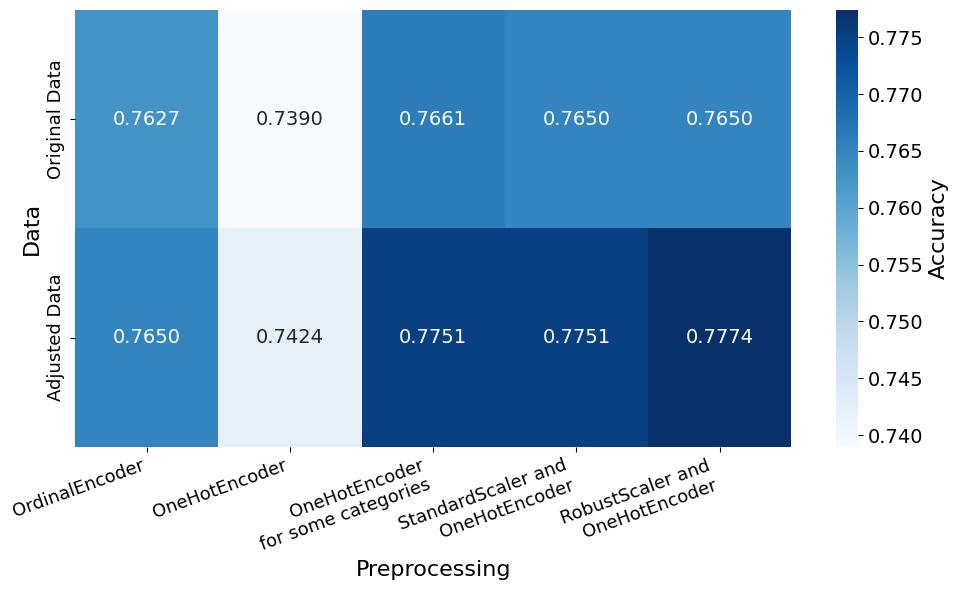

In [14]:
# Prepare data for heatmap
data = ['Original Data', 'Adjusted Data']
preprocessor = ['OrdinalEncoder', 'OneHotEncoder', 'OneHotEncoder\nfor some categories', 'StandardScaler and\nOneHotEncoder', 'RobustScaler and\nOneHotEncoder']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [accuracies[0], accuracies[1], accuracies[2], accuracies[3], accuracies[4]],
    [accuracies[5], accuracies[6], accuracies[7], accuracies[8], accuracies[9]],
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 6))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=preprocessor, yticklabels=data, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(rotation=20, ha='right')
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Preprocessing', fontsize=16)
ax.set_ylabel('Data', fontsize=16)
#ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_6_data.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Best model

In [ ]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(solver='newton-cg', max_iter=10000, fit_intercept=False)
logreg.fit(X_train, y_train)
accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

Figure

In [ ]:
# Confusion matrix
y_pred = logreg.predict(X_test)
target_names = ['Dropout', 'Enrolled', 'Graduate']
cm = confusion_matrix(y_test, y_pred, labels=target_names)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
df_cm = pd.DataFrame(cm_norm, index=target_names, columns=target_names)
plt.figure(figsize=(7, 6))
ax = sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=target_names,
                 yticklabels=target_names,
                 annot_kws={'fontsize':14})
plt.xlabel("Predicted label", fontsize=16)
plt.ylabel("True label", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'confusion_matrix_best_model.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

# ROC curve
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# One-vs-All cumulative gain plots for multiclass
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

for i, class_name in enumerate(classes):
    # Create binary probability array for this class: [prob_not_class, prob_class]
    probs_binary = np.vstack([1 - y_probas[:, i], y_probas[:, i]]).T
    plt.figure()
    skplt.metrics.plot_cumulative_gain(y_test_bin[:, i], probs_binary)
    plt.title(f'Cumulative Gain - {class_name}')
    plt.show()

In [ ]:
df = pd.read_csv("../Data/data.csv", sep=';')

# Print highest value for each category
print("\nHighest value for each category:")
print(df.drop("Target", axis=1).max())

In [ ]:
df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
y = df["Target"]
encoder = OrdinalEncoder() 
encoder.fit(X)
X_encoded = pd.DataFrame(encoder.transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
print("Accuracy with Ordinal Encoding on Original Data:", logreg.score(X_test, y_test))

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
print("Accuracy on Original Data:", logreg.score(X_test, y_test))

# More tests

In [ ]:
# Preprocessing raw data - ordinal encoder and max categories

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder(max_categories=20) # This limit gave best results
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

In [ ]:
# Preprocessing raw data - one hot encoder

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X.toarray(), columns=preprocessor.get_feature_names_out())
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

In [ ]:
# Preprocessing raw data - ordinal encoder and l2 regularization

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2')
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

In [ ]:
# Preprocessing adjusted data - ordinal encoder

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

In [ ]:
# Preprocessing adjusted data - one hot encoder

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with OneHotEncoder on all features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with OneHotEncoder on some features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with StandardScaler and OneHotEncoder on some features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))


df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = RobustScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with RobustScaler and OneHotEncoder on some features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

In [ ]:
# Preprocessing adjusted data - ordinal encoder and l2 regularization

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2')
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

In [ ]:
# Cross validation
accuracy = cross_validate(logreg, X_test, y_test, cv=10)['test_score']
print("Cross-validation scores:", accuracy)
print("Mean CV accuracy: {:.4f}".format(accuracy.mean()))
print("Test set accuracy with Logistic Regression: {:.4f}".format(logreg.score(X_test, y_test)))

# Confusion matrix
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

# ROC curve
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# One-vs-All cumulative gain plots for multiclass
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

for i, class_name in enumerate(classes):
    # Create binary probability array for this class: [prob_not_class, prob_class]
    probs_binary = np.vstack([1 - y_probas[:, i], y_probas[:, i]]).T
    plt.figure()
    skplt.metrics.plot_cumulative_gain(y_test_bin[:, i], probs_binary)
    plt.title(f'Cumulative Gain - {class_name}')
    plt.show()

In [ ]:
# Adjusted data + OrdinalEncoder + L2-regularized LogisticRegression with cross-validation


# load adjusted data
df_adj = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X_adj = df_adj.drop("Target", axis=1)
y_adj = df_adj["Target"]

# ordinal encode all features (as done in prior cells)
encoder_adj = OrdinalEncoder()
X_enc = pd.DataFrame(encoder_adj.fit_transform(X_adj), columns=X_adj.columns)

# train/test split (stratify to preserve class proportions)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    X_enc, y_adj, test_size=0.2, random_state=42, stratify=y_adj
)

# logistic regression with L2 (default) and multinomial for multiclass
lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, multi_class='multinomial')

# grid search over inverse regularization strength C, using stratified k-fold CV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(lr, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# fit grid on training portion
grid.fit(X_train_cv, y_train_cv)

# report CV results and evaluate on held-out test set
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

y_pred = grid.predict(X_test_cv)
print("Test accuracy:", accuracy_score(y_test_cv, y_pred))
print("\nClassification report:\n", classification_report(y_test_cv, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test_cv, y_pred))